In [1]:
# https://github.com/gchantas/Portfolio-management

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Mon Feb 21 15:53:07 2022

@author: gchantas
"""

from matplotlib import pyplot

import numpy as np
from numpy.random import randn,rand,set_state
from numpy.random import RandomState,multivariate_normal
from numpy.linalg import eigvals,eig,inv



0.3850150899945976


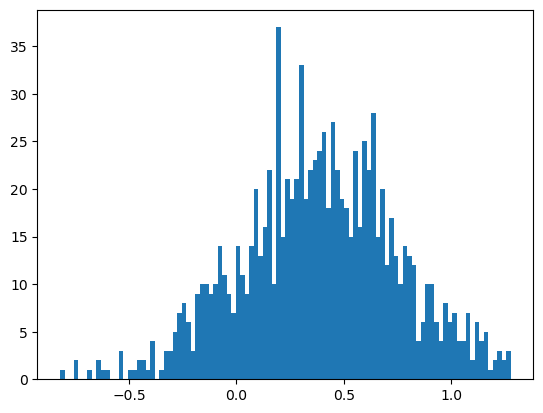

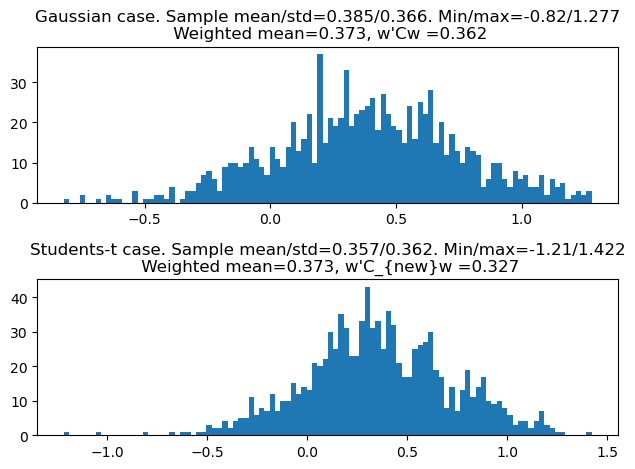

30.1
30.1


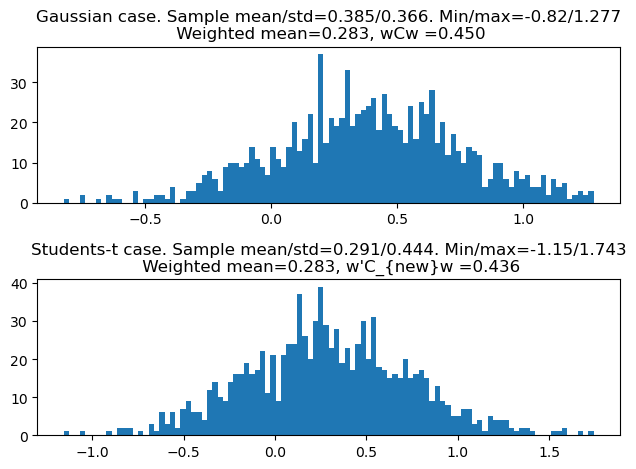

In [3]:
dimensions=10
S=50
X=np.zeros( (dimensions) )
M=np.zeros( (dimensions) )
C=np.zeros( (dimensions,dimensions) )

myseed=32
np.random.seed(myseed)

for i in range(S):
    X=randn(dimensions)
    M=M+(10)*X/S
    C=C+np.outer((X),(X))/S



w=np.zeros( (dimensions,) )

wnorm=0
for i in range(dimensions):
    w[i]=rand()


# w[0]=0.0
# w[5]=0.0

for i in range(dimensions):
    wnorm=wnorm+w[i]

for i in range(dimensions):
    w[i]=w[i]/wnorm



# print(w)
# selectW(C)
# print(w)

S2=1000
output=np.zeros( (S2) )
for i in range(S2):
    output[i]=(sum( ( w*np.random.multivariate_normal(M,C)) ).T)

print(sum(output/S2))

pyplot.hist(output,100)




outputT=np.zeros( (S2) )

#theta parameter of the Gamma distribution, mean is kappa*theta, where is set below wkappa= eigenvalue *theta, thus mean = eigenvalue


nuT=30.1 #Degress of freedom <---------------

lambdaT = 0
for i in range(dimensions):
    lambdaT= lambdaT + C[i,i]/dimensions


    
for i in range(S2):
    Cnew=np.zeros( (dimensions,dimensions) )

    sampleGamma=np.random.gamma(nuT/2,2/nuT)
    
    Cnew=sampleGamma*C
    outputT[i]=(sum( ( w*np.random.multivariate_normal(M,Cnew)) ).T)

# for i in range(S2):
    
    
#     X=np.zeros( (N) )
#     C2=np.zeros( (N,N) )+C*S/(S2+S)
#     for j in range(S2):
#         X=randn(N)
#         C2=C2+np.outer((X),(X))/(S2+S)
   
#     outputT[i]=(sum( ( w*multivariate_normal(M,C2)) ).T)

# print(sum(outputT/S2))

fig, axes = pyplot.subplots( 2,1, tight_layout=True)
ax0, ax1= axes.flatten()

ax0.hist(output,100)
ax1.hist(outputT,100)


ax0.set_title( 'Gaussian case. Sample mean/std='+str(np.mean(output))[0:5] +'/'+str(np.std(output))[0:5]+'. Min/max='+str(min(output))[0:5]+'/'+str(max(output))[0:5]+"\n Weighted mean="+str(sum(w*M.T))[0:5]+", w'Cw ="+str(np.sqrt(sum(w*(C.dot(w)).T)))[0:5])
ax1.set_title( 'Students-t case. Sample mean/std='+str(np.mean(outputT))[0:5] +'/'+str(np.std(outputT))[0:5]+'. Min/max='+str(min(outputT))[0:5]+'/'+str(max(outputT))[0:5]+"\n Weighted mean="+str(sum(w*M.T))[0:5]+", w'C_{new}w ="+str(np.sqrt((nuT/(nuT-2))*sum(w*(Cnew.dot(w)).T)))[0:5])

pyplot.show()
##############################################################################


from tkinter import Tk, Scale, Button, HORIZONTAL,mainloop,Text

from tkinter import *
from tkinter import ttk

def selectW():
    global dimensions
    N=dimensions
    global nuT
    global w
    global Cnew

    print(1)
    L,E=eig(Cnew)
    mu=0.1;
    
    langrangeMult=2*N*mu/(sum(1/L));
    wnew=np.zeros( (N))
    for i in range(N):
        wnew[i]=langrangeMult/L[i]
        
    w=(E.T).dot(wnew)
    
    wnorm=0
    for i in range(dimensions):
        if(w[i]<0):
            w[i]=0;
        else:
            wnorm=wnorm+w[i]

    for i in range(dimensions):
        w[i]=w[i]/wnorm
    
    global wSlider
    for i in range(N):
        wSlider[i].set(w[i]*100)
        wSlider[i].grid(row=i,column=0)
        print (wSlider[i].get())
    

def setNu():
    global nuT
    nuT=float(e.get())
    print(nuT)
    
def equalize_values():
    global dimensions
    N=dimensions
    for i in range(N):
        wSlider[i].set(100/N)
        wSlider[i].grid(row=i,column=0)
        print (wSlider[i].get())

def rescale_values():
    global dimensions
    N=dimensions
    sum1=0.0;
    for i in range(N):
        sum1=sum1+wSlider[i].get()

    # if sum1==0:
    #     sum1=1;
    global w
    for i in range(N):
        wSlider[i].set(100*wSlider[i].get()/sum1)
        wSlider[i].grid(row=i,column=0)
        w[i]=wSlider[i].get()/100

    print(nuT)

    outputT=np.zeros( (S2) )
    
    #theta parameter of the Gamma distribution, mean is kappa*theta, where is set below wkappa= eigenvalue *theta, thus mean = eigenvalue
   
    #nuT=4.1 #Degress of freedom <---------------
    

    
        
    for i in range(S2):
        Cnew=np.zeros( (dimensions,dimensions) )
    
        sampleGamma=np.random.gamma(nuT/2,2/nuT)
        
        Cnew=sampleGamma*C
        outputT[i]=(sum( ( w*np.random.multivariate_normal(M,Cnew)) ).T)


    fig2, axes2 = pyplot.subplots( 2,1, tight_layout=True)
    ax02, ax12= axes2.flatten()

    ax12.hist(outputT,100)
    ax02.hist(output,100)
    ax02.set_title( 'Gaussian case. Sample mean/std='+str(np.mean(output))[0:5] +'/'+str(np.std(output))[0:5]+'. Min/max='+str(min(output))[0:5]+'/'+str(max(output))[0:5]+"\n Weighted mean="+str(sum(w*M.T))[0:5]+", wCw ="+str(np.sqrt(sum(w*(C.dot(w)).T)))[0:5])
    ax12.set_title( 'Students-t case. Sample mean/std='+str(np.mean(outputT))[0:5] +'/'+str(np.std(outputT))[0:5]+'. Min/max='+str(min(outputT))[0:5]+'/'+str(max(outputT))[0:5]+"\n Weighted mean="+str(sum(w*M.T))[0:5]+", w'C_{new}w ="+str(np.sqrt(nuT*sum(w*(Cnew.dot(w)).T)/(nuT-2)))[0:5])
    pyplot.show()
##############################################################################


    
master = Tk()


wSlider = []
for i in range(dimensions):
    wSlider.append( Scale(master,length=300, from_=0, to=100, tickinterval=50, orient=HORIZONTAL,label='correspondnig mean: '+str(M[i])[0:5]+' std:'+str(C[i,i])[0:5]))
    wSlider[i].set(w[i]*100)
    wSlider[i].grid(row=i,column=0)

Button(master, text='Equalize wieghts', command=equalize_values,borderwidth=2).grid(row=3,column=1)
Button(master, text='Normalize changed weights \n and show histogram',borderwidth=2, command=rescale_values).grid(row=6,column=1)

l = ttk.Label(master, text = "")
l.grid(row=2,column=2)

Button(master, text='Set the degrees of freedom, nu=', command=setNu,borderwidth=1 ).grid(row=2,column=1)
e = Entry(master,width=10)
e.insert(0, str(nuT))
e.grid(row=2,column=2)


Button(master, text='Select "optimal" w\'s', command=selectW).grid(row=4,column=1)
# ConstraintMu = ttk.Label(master, text = "Weighted mean="+str(sum(w*M.T))[0:5] )
# ConstraintSigma = ttk.Label(master, text =  "wCw ="+str(sum(w*(C.dot(M)).T))[0:5])
# ConstraintMu.pack()
# ConstraintSigma.pack()
# ConstraintMu

mainloop()